# PIMA Indian Diabetes Dataset 

### About Dataset

#### Context
###### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
##### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Problem Statement:
Build a model to accurately predict whether the patients in the dataset have diabetes or not. The datasets consists of several medical predictor variables and one target variable, Outcome. 

##### Pregnancies: Number of times pregnant
##### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### BloodPressure: Diastolic blood pressure (mm Hg)
##### SkinThickness: Triceps skin fold thickness (mm)
##### Insulin: 2-Hour serum insulin (mu U/ml)
##### BMI: Body mass index (weight in kg/(height in m)^2)
##### DiabetesPedigreeFunction: Diabetes pedigree function
##### Age: Age (years)
##### Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Contribution towards the project:

#### The objective is to find a model which will be able to predict whether a person is likely to have diabetes or not given their medical records. Various classification models will be tested against this dataset to find the one which will be best suited for this problem, so that given the symptoms we can predict the outcome of the patient before hand so that precautionary measures can be taken.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Importing Data

In [2]:
df = pd.read_csv("diabetes.csv")

#### Understanding the Dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Finding missing values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###### From the describe function we can have a understanding that the null or the missing values of this dataset has already been altered with zero

#### Finding Correlation

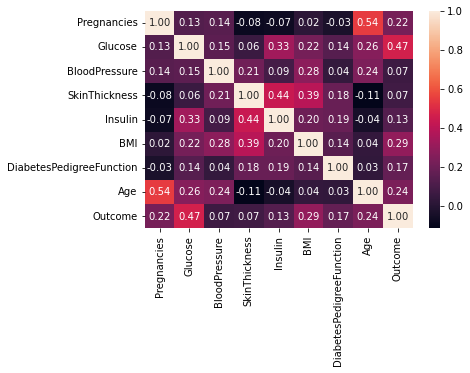

In [7]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

#### Exploratory Data Analysis

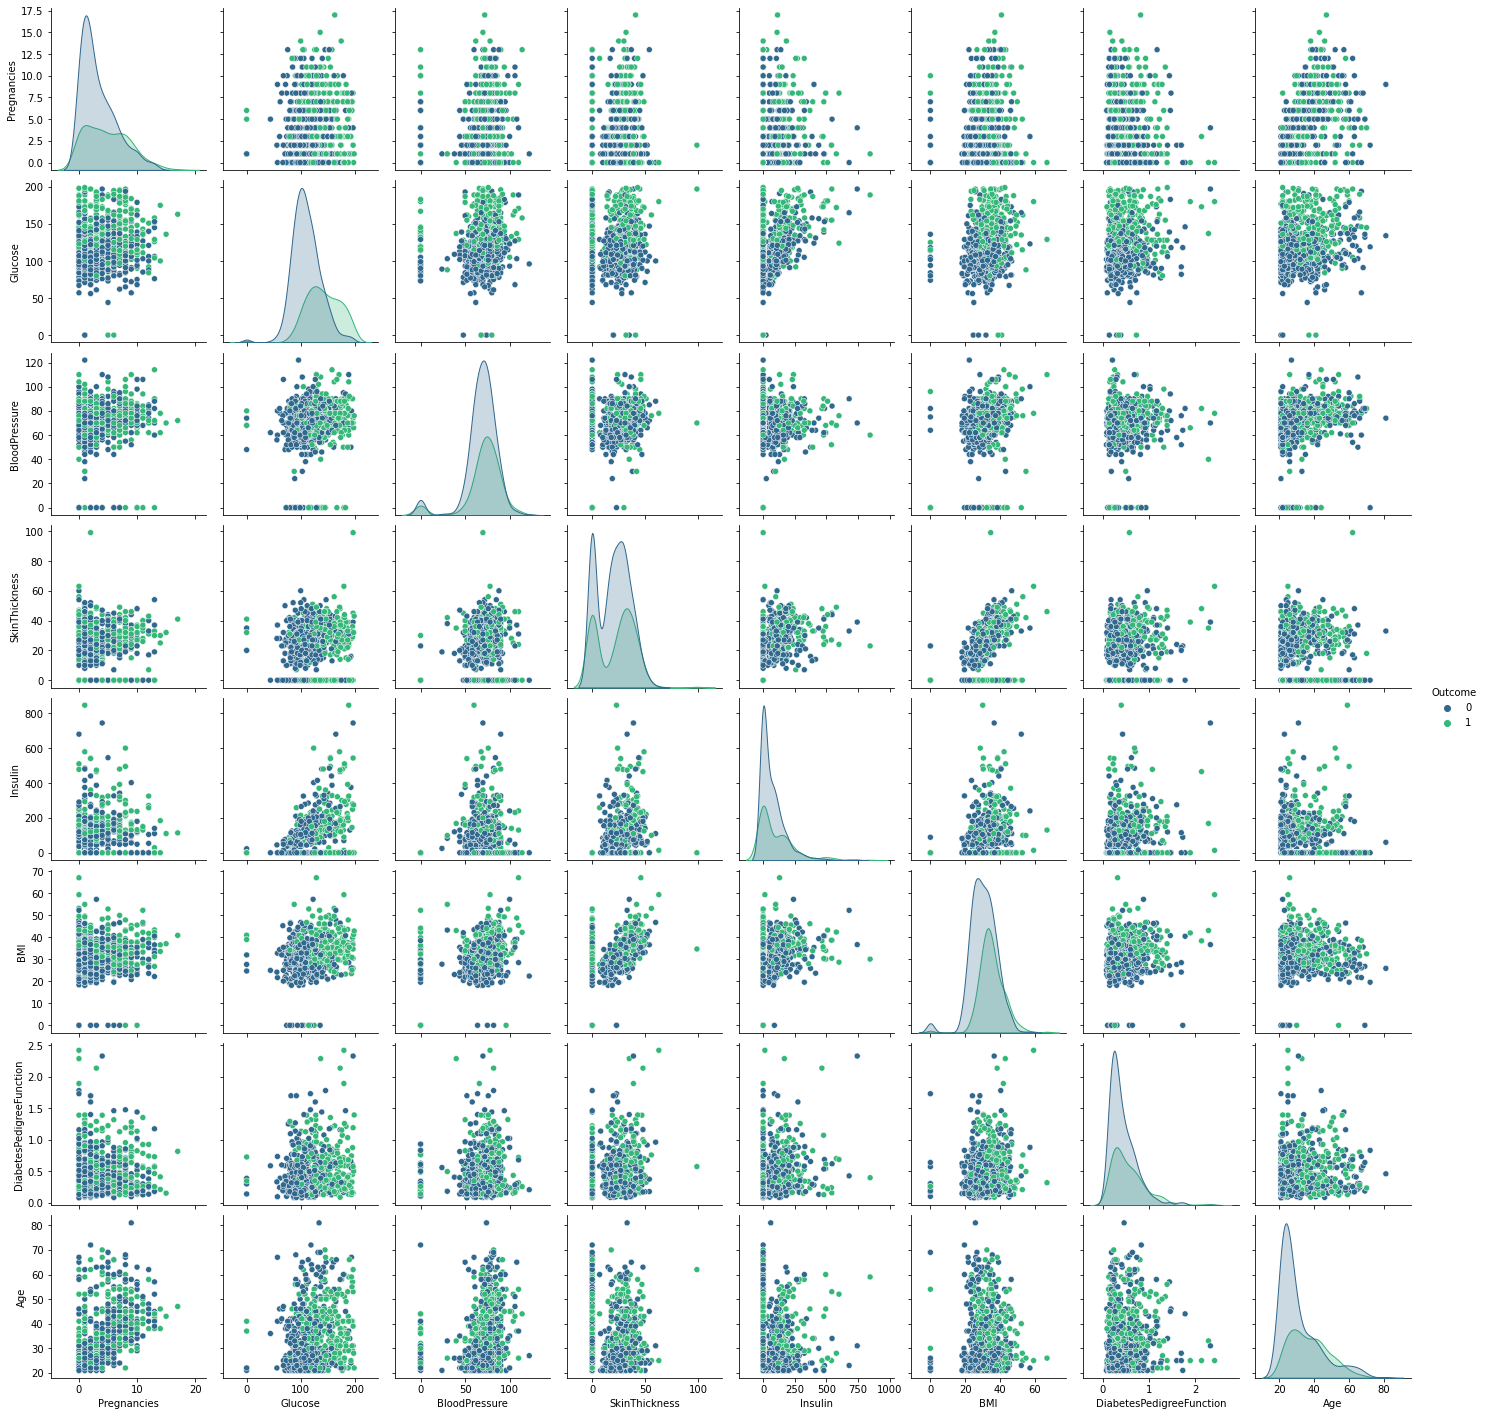

In [8]:
sns.pairplot(df, hue = 'Outcome', palette= 'viridis')

Text(0.5, 1.0, 'Diabetes Patient')

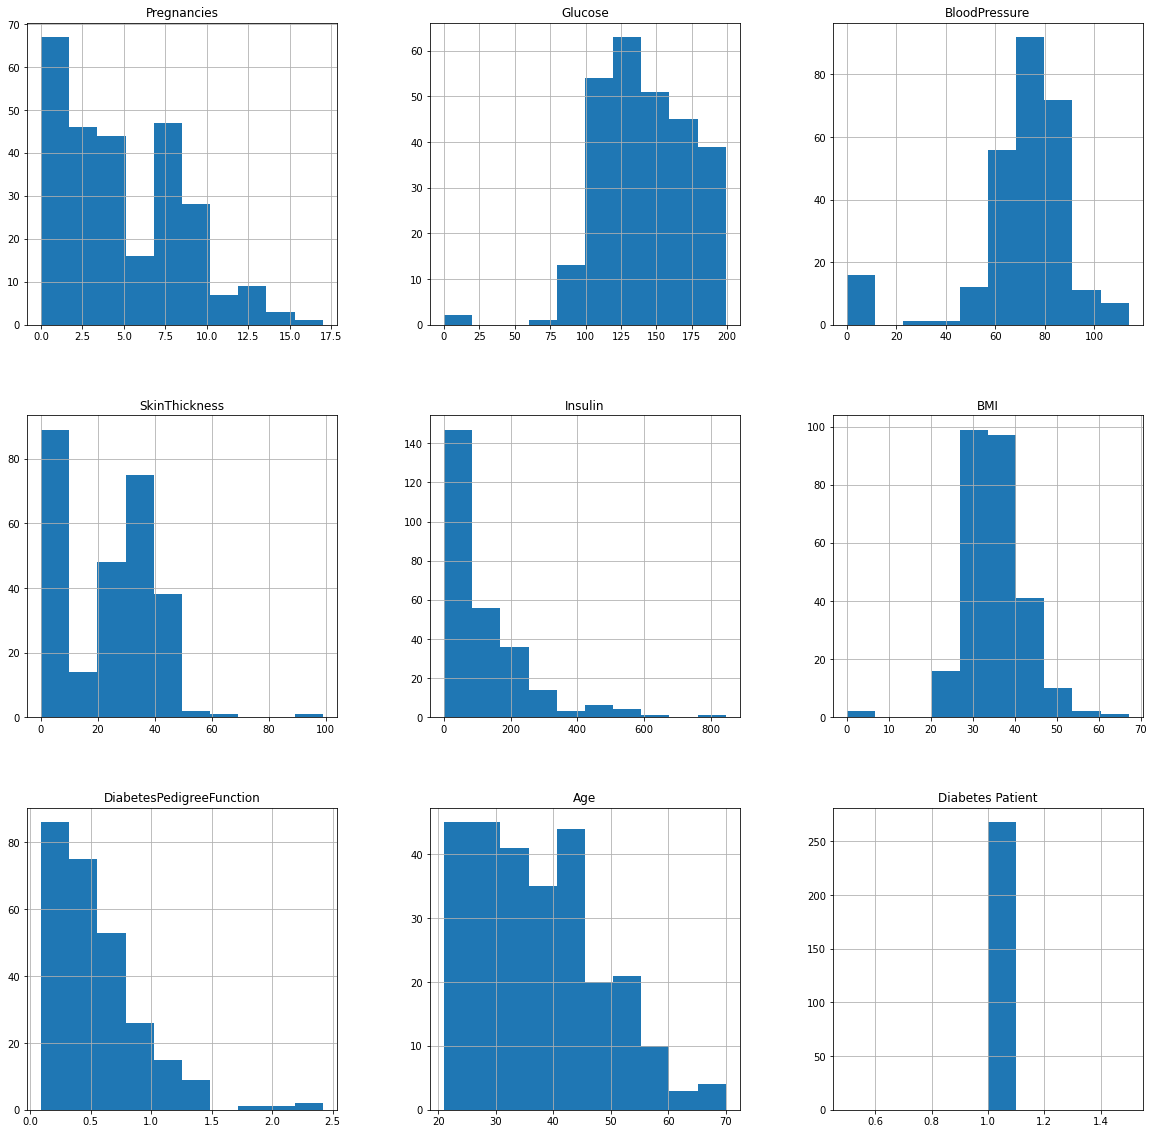

In [9]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

Text(0.5, 1.0, 'Diabetes Patient')

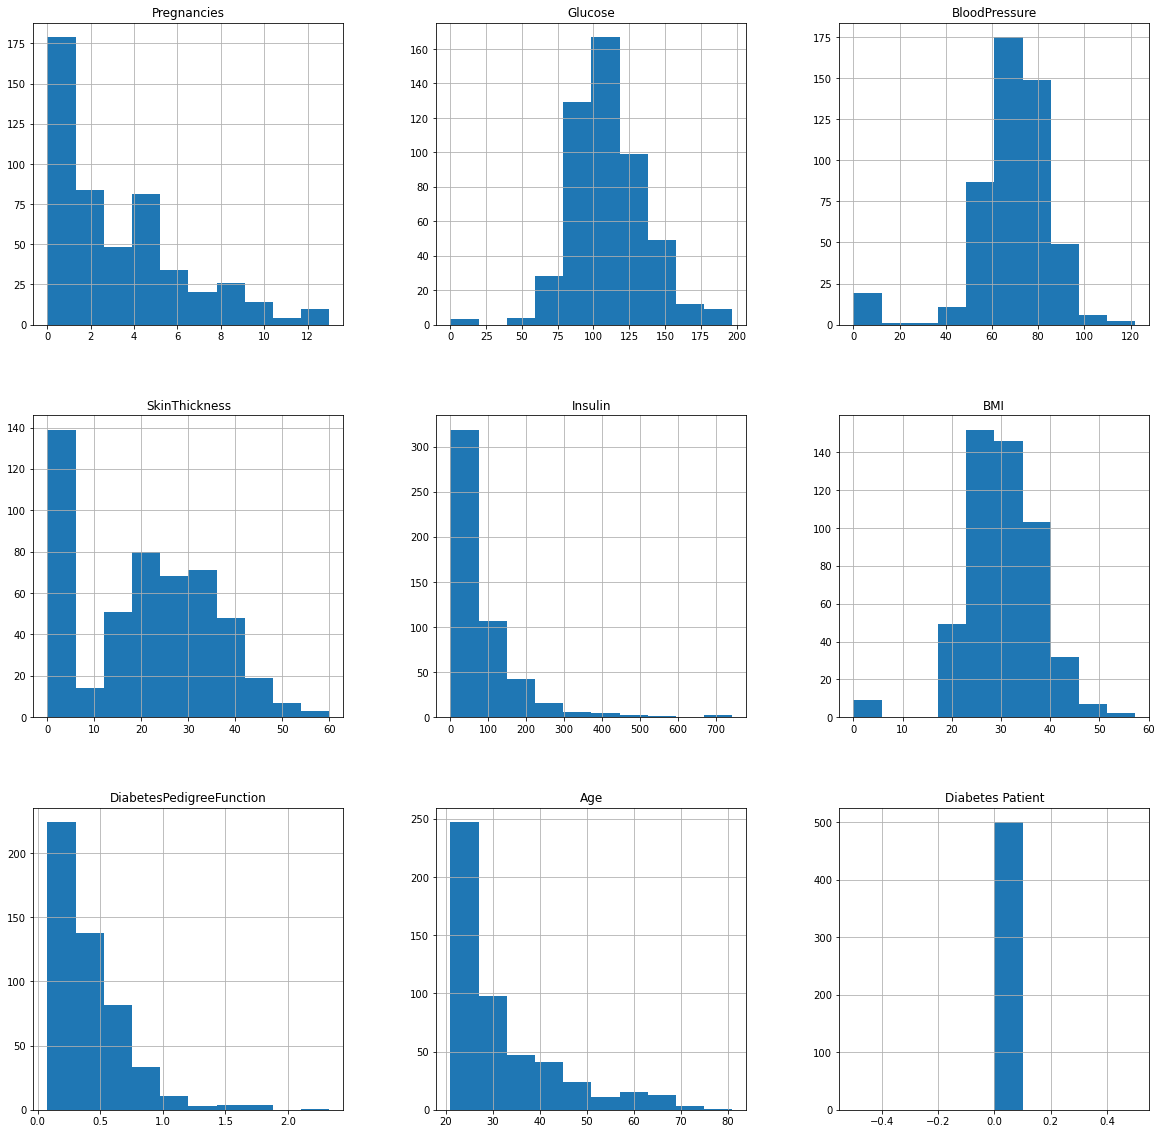

In [10]:
p = df[df['Outcome']==0].hist(figsize = (20,20))
plt.title('Diabetes Patient')

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

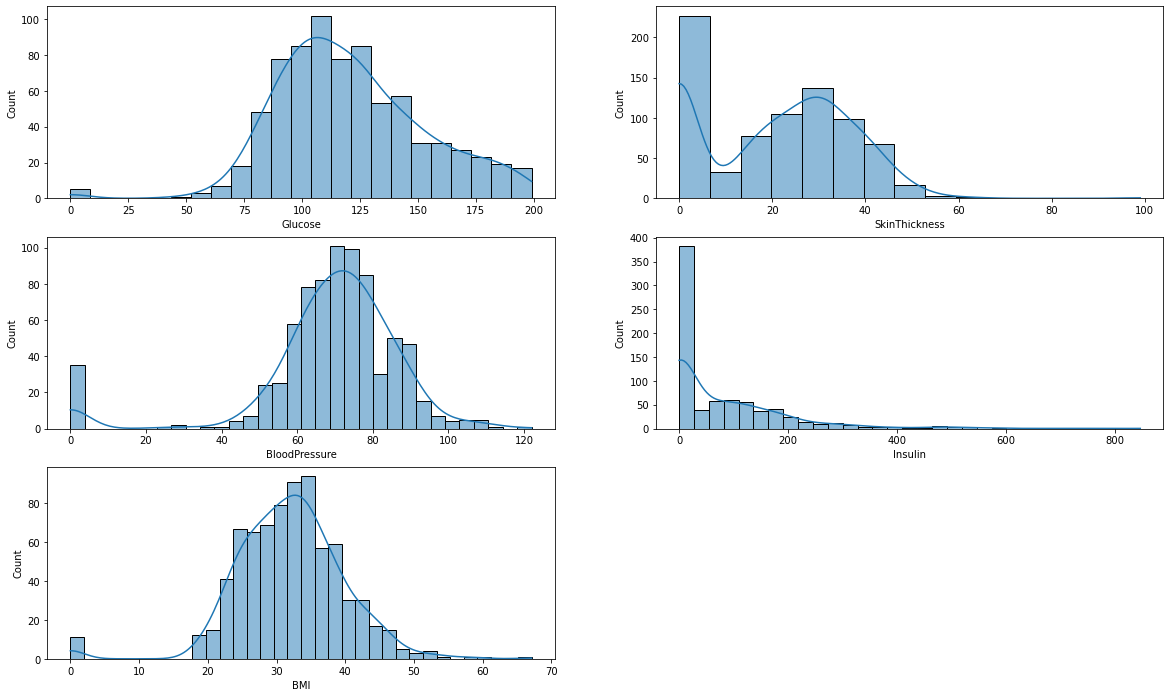

In [12]:
plt.figure(figsize=[20,12])
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
sns.histplot(data= df, x='Glucose', kde=True, ax=ax1)
sns.histplot(data= df, x='SkinThickness', kde=True, ax=ax2)
sns.histplot(data= df, x='BloodPressure', kde=True, ax=ax3)
sns.histplot(data= df, x='Insulin', kde=True, ax=ax4)
sns.histplot(data= df, x='BMI', kde=True, ax=ax5)
plt.show()

##### From the histogram plot we can see that these five features has some 0 value, which is not possible. Skin thickness & insulin has the highest 0 values in the dataset.

### Finding the number of values as 0.

In [13]:
num_missing = (df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()
print(num_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


### Replacing 0 with NaN value for imputation.

In [14]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, nan)
# count the number of nan values in each column
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [15]:
#percentage of missing value

df.isna().sum() * 100 / df.shape[0]

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

#### We can see Insulin has 48.7% of missing value and hence should be dropped.

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [17]:
df[['Insulin']] = df[['Insulin']].replace(np.NaN, 0)

#### Visualizing the missing values with the help of heatmap

<AxesSubplot:>

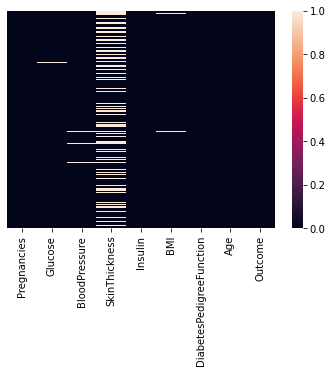

In [18]:
sns.heatmap(df.isnull(), yticklabels= False)

## Imputation of missing values

In [19]:
df_pima = df
df_pima.shape

(768, 9)

In [20]:
df_pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
mice = IterativeImputer(estimator= RandomForestRegressor(), random_state= 0)

In [22]:
df_pima[["Pregnancies", "Insulin", "SkinThickness", "Glucose", "BloodPressure", "BMI"]] = mice.fit_transform(df_pima[["Pregnancies", "Insulin","SkinThickness", "Glucose", "BloodPressure", "BMI"]])

In [23]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,20.24,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.00,0.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,26.46,0.0,30.1,0.349,47,1


In [24]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

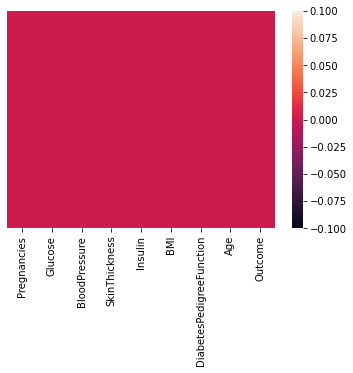

In [25]:
sns.heatmap(df_pima.isnull(), yticklabels= False)

#### Visualizing the binary class

<AxesSubplot:xlabel='Outcome', ylabel='count'>

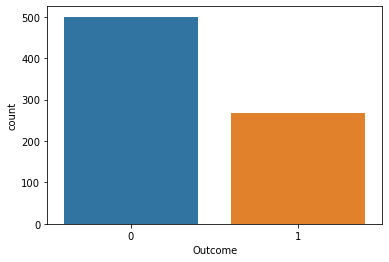

In [26]:
sns.countplot(x = 'Outcome', data = df_pima)

In [27]:
(df_pima['Outcome']==1).sum()*100 / df_pima.shape[0]

34.895833333333336

We can see the class is not uniformy distributed. Hence, this has to taken care during modeling.

<AxesSubplot:xlabel='Age'>

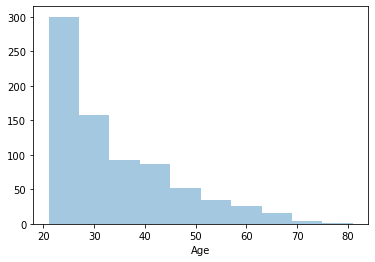

In [28]:
sns.distplot(df_pima['Age'],kde=False,bins=10)

<AxesSubplot:xlabel='Pregnancies'>

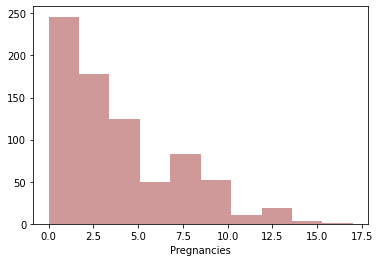

In [29]:
sns.distplot(df_pima['Pregnancies'].dropna(),kde=False,bins=10, color = 'darkred')

<AxesSubplot:xlabel='BMI'>

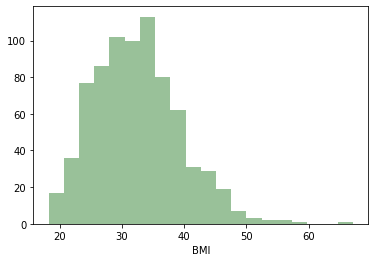

In [30]:
sns.distplot(df_pima['BMI'].dropna(),kde=False,bins=20, color= 'darkgreen')

<AxesSubplot:xlabel='Glucose'>

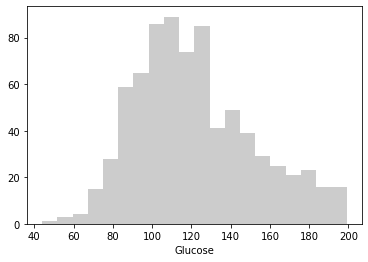

In [31]:
sns.distplot(df_pima['Glucose'].dropna() ,kde=False,bins=20, color= 'grey')

In [32]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.631380,72.436237,28.878320,79.799479,32.420734,0.471876,33.240885,0.348958
std,3.369578,30.458658,12.172660,9.617743,115.244002,6.910083,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.195000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizing & Treating outliers

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

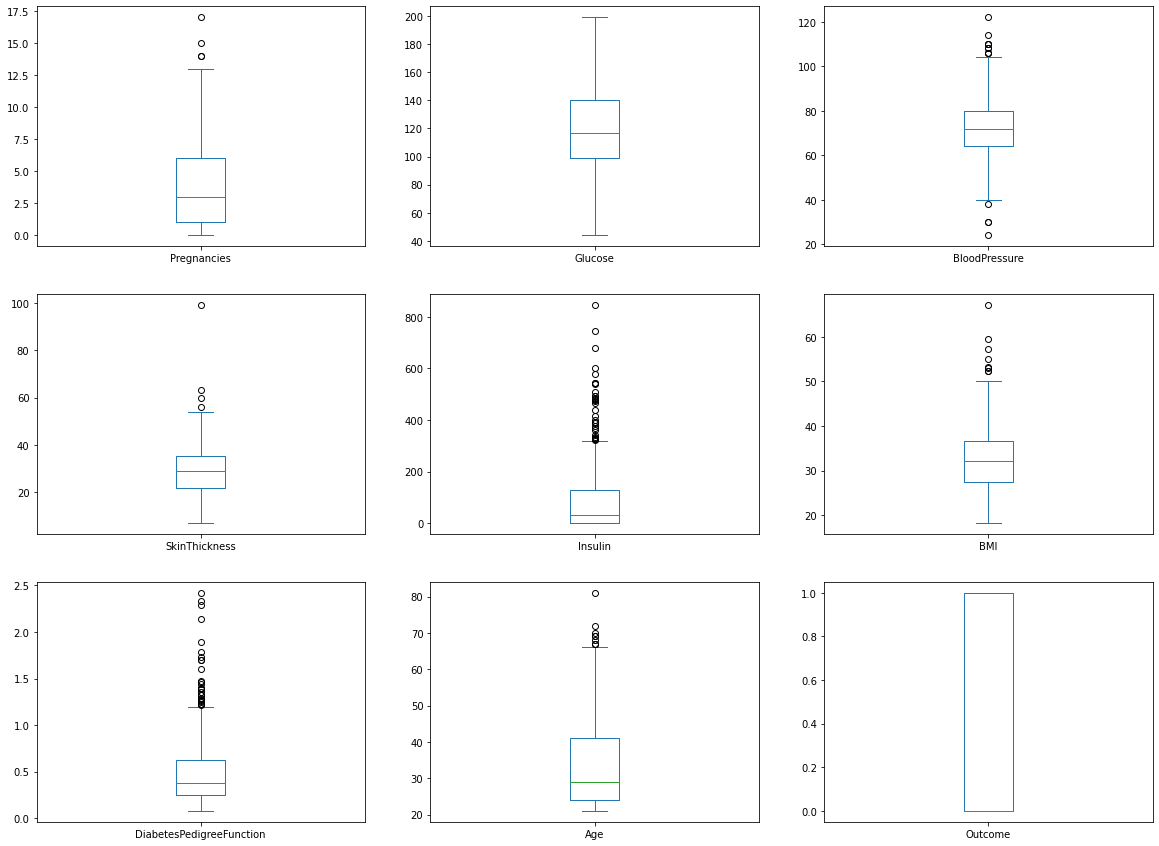

In [33]:
#Box and Whisker plot to visualize the distribution of all atributes
df_pima.plot(kind= 'box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [34]:
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [35]:
# model specification
model1 = LocalOutlierFactor(n_neighbors=10)
# model fitting
y_pred = model1.fit_predict(df_pima)
# filter outlier index
not_outlier_index = np.where(y_pred == 1)
outlier_index = np.where(y_pred == -1)# negative values are outliers and positives inliers
# filter outlier values
df_pima_1 = df_pima.iloc[not_outlier_index]

In [36]:
df_pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,20.24,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.00,0.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,26.46,0.0,30.1,0.349,47,1


In [37]:
df_pima_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,20.24,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.00,0.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,26.46,0.0,30.1,0.349,47,1


In [38]:
df_pima_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               743 non-null    float64
 1   Glucose                   743 non-null    float64
 2   BloodPressure             743 non-null    float64
 3   SkinThickness             743 non-null    float64
 4   Insulin                   743 non-null    float64
 5   BMI                       743 non-null    float64
 6   DiabetesPedigreeFunction  743 non-null    float64
 7   Age                       743 non-null    int64  
 8   Outcome                   743 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 58.0 KB


In [39]:
df_pima_1.to_csv("df_pima_1.csv", sep=',')

### Making copies of the dataset

In [40]:
df_pima_l = df_pima_1

In [41]:
df_pima_lr = df_pima_1

In [42]:
df_pima_xgb = df_pima_1

In [43]:
df_pima_q = df_pima_1

In [44]:
df_pima_k = df_pima_1

### Spliting the dataset into Train and Test

In [45]:
X = df_pima_1.drop(["Outcome"], axis = 1)
y = df_pima_1.Outcome

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=10, test_size= 0.3, stratify= y)

### K - Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    test_scores.append(knn.score(X_test,y_test))

In [50]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 81.16591928251121 % and k = [8]


In [152]:
knn = KNeighborsClassifier(8)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [53]:
knn_pred = knn.predict(X_test)

In [54]:
score = metrics.accuracy_score(y_test, knn_pred)
score

0.8116591928251121

In [55]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       145
           1       0.85      0.56      0.68        78

    accuracy                           0.81       223
   macro avg       0.82      0.75      0.77       223
weighted avg       0.82      0.81      0.80       223



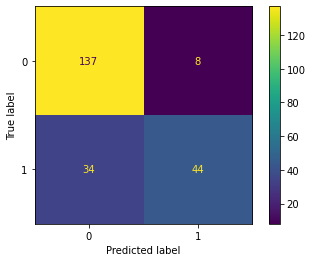

In [56]:
cm = confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

#### Feature importance for KNN

Feature: 0, Score: 0.00154
Feature: 1, Score: 0.07385
Feature: 2, Score: 0.00615
Feature: 3, Score: -0.00077
Feature: 4, Score: -0.00577
Feature: 5, Score: 0.01000
Feature: 6, Score: -0.00192
Feature: 7, Score: 0.01269


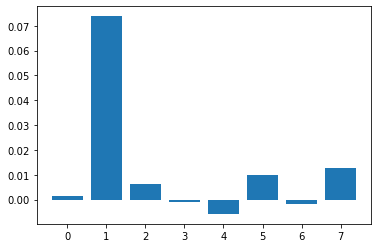

In [57]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [58]:
df_pima_k.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
X_k = df_pima_k.drop(["Outcome", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"], axis = 1)
y_k = df_pima_k.Outcome

In [61]:
scaler = StandardScaler()
X_scaled_k = scaler.fit_transform(X_k)

In [62]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_scaled_k, y_k, random_state=10, test_size= 0.3, stratify= y_k)

In [64]:
test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_k,y_train_k)
    test_scores.append(knn.score(X_test_k,y_test_k))

In [65]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.37219730941703 % and k = [5, 7, 28]


In [68]:
knn_k = KNeighborsClassifier(28)

In [69]:
knn_k.fit(X_train_k,y_train_k)

KNeighborsClassifier(n_neighbors=28)

In [70]:
knn_pred = knn_k.predict(X_test_k)

In [71]:
score = metrics.accuracy_score(y_test_k, knn_pred)
score

0.7937219730941704

In [72]:
print(classification_report(y_test_k, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       145
           1       0.79      0.56      0.66        78

    accuracy                           0.79       223
   macro avg       0.79      0.74      0.75       223
weighted avg       0.79      0.79      0.78       223



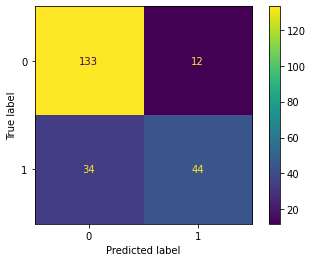

In [73]:
cm = confusion_matrix(y_test_k, knn_pred, labels= knn_k.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

### Linear Discriminent Analysis

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [153]:
lda = LinearDiscriminantAnalysis()

In [159]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [77]:
lda_pred = lda.predict(X_test)

In [78]:
score = metrics.accuracy_score(y_test, lda_pred)
score

0.7937219730941704

In [79]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       145
           1       0.79      0.56      0.66        78

    accuracy                           0.79       223
   macro avg       0.79      0.74      0.75       223
weighted avg       0.79      0.79      0.78       223



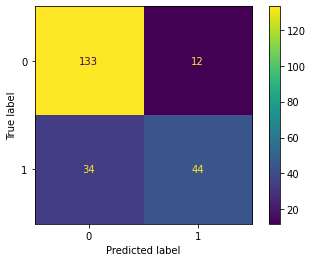

In [80]:
cm = confusion_matrix(y_test, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.00077
Feature: 1, Score: 0.13231
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00346
Feature: 4, Score: 0.00038
Feature: 5, Score: 0.01654
Feature: 6, Score: 0.00923
Feature: 7, Score: -0.00308


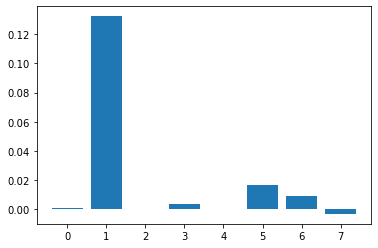

In [81]:
# perform permutation importance
results = permutation_importance(lda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [82]:
df_pima_l.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [90]:
X_l = df_pima_l.drop(["Outcome", "Age", "BloodPressure"], axis = 1)
y_l = df_pima_l.Outcome

In [91]:
scaler = StandardScaler()
X_scaled_l = scaler.fit_transform(X_l)

In [92]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_scaled_l, y_l, random_state=10, test_size= 0.3, stratify= y_l)

In [93]:
lda.fit(X_train_l, y_train_l)

LinearDiscriminantAnalysis()

In [94]:
lda_pred = lda.predict(X_test_l)

In [95]:
score = metrics.accuracy_score(y_test_l, lda_pred)
score

0.7982062780269058

In [96]:
print(classification_report(y_test_l, lda_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       145
           1       0.79      0.58      0.67        78

    accuracy                           0.80       223
   macro avg       0.80      0.75      0.76       223
weighted avg       0.80      0.80      0.79       223



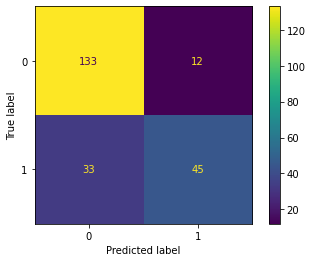

In [97]:
cm = confusion_matrix(y_test_l, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

### Quadratic Discriminent Analysis

In [98]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [154]:
qda = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [161]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [101]:
qda_pred = qda.predict(X_test)

In [102]:
score = metrics.accuracy_score(y_test, qda_pred)
score

0.7713004484304933

In [103]:
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       145
           1       0.67      0.69      0.68        78

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



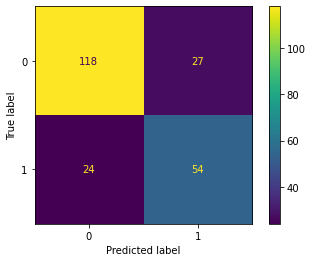

In [104]:
cm = confusion_matrix(y_test, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.02115
Feature: 1, Score: 0.09538
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00577
Feature: 4, Score: 0.02115
Feature: 5, Score: 0.01038
Feature: 6, Score: 0.01269
Feature: 7, Score: 0.01923


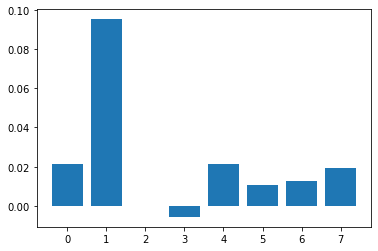

In [105]:
# perform permutation importance
results = permutation_importance(qda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [106]:
df_pima_q.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [107]:
X_q = df_pima_q.drop(["Outcome","BloodPressure", "SkinThickness"], axis = 1)
y_q = df_pima_q.Outcome

In [108]:
scaler = StandardScaler()
X_scaled_q = scaler.fit_transform(X_q)

In [109]:
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_scaled_q, y_q, random_state=10, test_size= 0.3, stratify= y_q)

In [110]:
qda.fit(X_train_q, y_train_q)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [111]:
qda_pred = qda.predict(X_test_q)

In [112]:
score = metrics.accuracy_score(y_test_q, qda_pred)
score

0.7757847533632287

In [113]:
print(classification_report(y_test_q, qda_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       145
           1       0.66      0.73      0.70        78

    accuracy                           0.78       223
   macro avg       0.75      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223



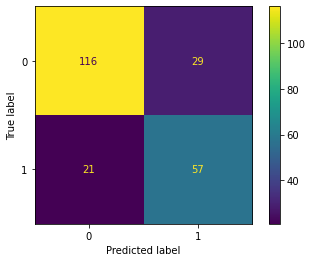

In [114]:
cm = confusion_matrix(y_test_q, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [155]:
lr = LogisticRegression(C= 2, class_weight= 0)

In [156]:
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=0)

In [117]:
lr_pred = lr.predict(X_test)

In [118]:
metrics.accuracy_score(y_test,lr_pred)

0.7982062780269058

In [119]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       145
           1       0.80      0.56      0.66        78

    accuracy                           0.80       223
   macro avg       0.80      0.74      0.76       223
weighted avg       0.80      0.80      0.79       223



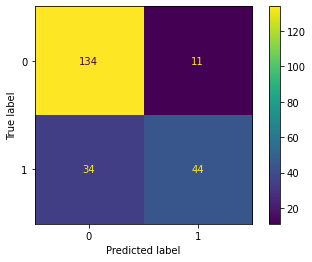

In [120]:
cm = confusion_matrix(y_test, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.27714
Feature: 1, Score: 1.06698
Feature: 2, Score: -0.00384
Feature: 3, Score: 0.08790
Feature: 4, Score: -0.12004
Feature: 5, Score: 0.48500
Feature: 6, Score: 0.21985
Feature: 7, Score: 0.18008


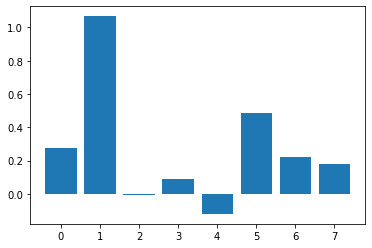

In [121]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression using Stats Model

In [122]:
import statsmodels.api as sm

In [123]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.540734
         Iterations 6


In [124]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  520
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Jun 2022   Pseudo R-squ.:                  0.1663
Time:                        19:54:46   Log-Likelihood:                -281.18
converged:                       True   LL-Null:                       -337.29
Covariance Type:            nonrobust   LLR p-value:                 3.193e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2639      0.128      2.065      0.039       0.013       0.514
x2             1.0742      0.135      7.945      0.000       0.809       1.339
x3            -0.0283      0.119     -0.237      0.8

In [125]:
df_pima_lr.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [126]:
X_lr = df_pima_lr.drop(["Outcome","BloodPressure", "Insulin"], axis = 1)
y_lr = df_pima_lr.Outcome

In [127]:
scaler = StandardScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

In [128]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled_lr, y_lr, random_state=10, test_size= 0.3, stratify= y_lr)

In [129]:
lr.fit(X_train_lr, y_train_lr)

LogisticRegression(C=2, class_weight=0)

In [130]:
lr_pred = lr.predict(X_test_lr)

In [131]:
metrics.accuracy_score(y_test_lr,lr_pred)

0.7937219730941704

In [132]:
print(classification_report(y_test_lr, lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       145
           1       0.81      0.54      0.65        78

    accuracy                           0.79       223
   macro avg       0.80      0.73      0.75       223
weighted avg       0.80      0.79      0.78       223



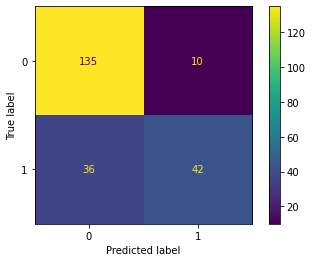

In [133]:
cm = confusion_matrix(y_test_lr, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

### XG- Boost

In [134]:
from xgboost import XGBClassifier

In [157]:
xgb = XGBClassifier(n_estimators=2000, max_depth=3, 
                    learning_rate=0.2, booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
pred_x = xgb.predict(X_test)

In [137]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7757847533632287

In [138]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       145
           1       0.69      0.64      0.67        78

    accuracy                           0.78       223
   macro avg       0.75      0.74      0.75       223
weighted avg       0.77      0.78      0.77       223



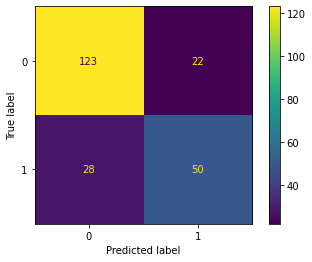

In [139]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

In [140]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [141]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'n_estimators': hp.quniform('n_estimator',1000, 5000, 500),
        'learning_rate': hp.uniform('learning_rate', 0.01, 5),
        'seed': 0
    }
        

In [142]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [143]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:                                                                                                                 
0.6771300448430493                                                                                                     
SCORE:                                                                                                                 
0.7354260089686099                                                                                                     
SCORE:                                                                                                                 
0.6502242152466368                                                                                                     
SCORE:                                                                                                                 
0.6502242152466368                                                                                                     
SCORE:                                  

In [144]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5729687137992815, 'learning_rate': 1.5900513395495357, 'max_depth': 5.0, 'n_estimator': 4500.0}


In [145]:
xgb = XGBClassifier(n_estimators = 4500, colsample_bytree = 0.5729687137992815,learning_rate = 1.5900513395495357, 
                    max_depth = 5,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5729687137992815, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.5900513395495357,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=5,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=4500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [146]:
pred_x = xgb.predict(X_test)

In [147]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7802690582959642

In [148]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       145
           1       0.70      0.64      0.67        78

    accuracy                           0.78       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.78      0.78      0.78       223



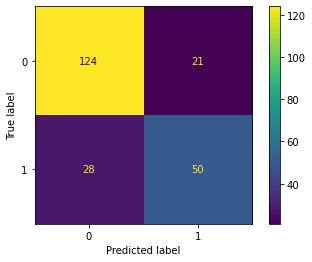

In [149]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.25867
Feature: 1, Score: 0.22783
Feature: 2, Score: 0.13667
Feature: 3, Score: 0.07981
Feature: 4, Score: 0.03467
Feature: 5, Score: 0.17561
Feature: 6, Score: 0.02287
Feature: 7, Score: 0.06387


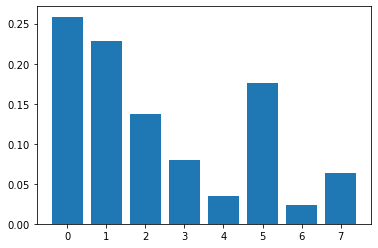

In [150]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### AUC-AOC Curve

In [162]:
# predict probabilities
pred_prob1 = lda.predict_proba(X_test)
pred_prob2 = qda.predict_proba(X_test)
pred_prob3 = lr.predict_proba(X_test)
pred_prob4 = xgb.predict_proba(X_test)

In [163]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [164]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.865870910698497 0.8502210433244916 0.8673740053050398 0.813527851458886


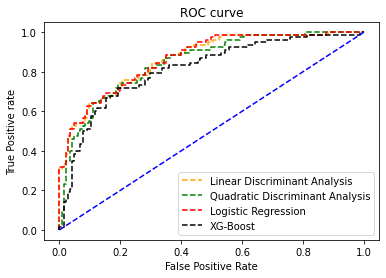

In [165]:
# matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Linear Discriminant Analysis')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Quadratic Discriminant Analysis')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='XG-Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### XG-Boost

In [166]:
df_pima_xgb.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [167]:
X_xgb = df_pima_xgb.drop(["Outcome","Age"], axis = 1)
y_xgb = df_pima_xgb.Outcome

In [168]:
scaler = StandardScaler()
X_scaled_xgb = scaler.fit_transform(X_xgb)

In [169]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled_xgb, y_xgb, random_state=10, test_size= 0.3, stratify= y_xgb)

In [170]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_xgb, y_train_xgb), ( X_test_xgb, y_test_xgb)]
    
    clf.fit(X_train_xgb, y_train_xgb,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_xgb)
    accuracy = accuracy_score(y_test_xgb, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [171]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:                                                                                                                 
0.5919282511210763                                                                                                     
SCORE:                                                                                                                 
0.5829596412556054                                                                                                     
SCORE:                                                                                                                 
0.726457399103139                                                                                                      
SCORE:                                                                                                                 
0.6502242152466368                                                                                                     
SCORE:                                  

In [172]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9977486078194149, 'learning_rate': 1.061464559395398, 'max_depth': 3.0, 'n_estimator': 1000.0}


In [173]:
xgb = XGBClassifier(n_estimators = 1000, colsample_bytree = 0.9977486078194149,learning_rate = 1.061464559395398, 
                    max_depth = 3,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train_xgb, y= y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9977486078194149, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.061464559395398,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [174]:
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9977486078194149, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.061464559395398,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [175]:
xgb_pred = xgb.predict(X_test_xgb)

In [176]:
metrics.accuracy_score(y_test_xgb,xgb_pred)

0.7982062780269058

In [177]:
print(classification_report(y_test_xgb, xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       145
           1       0.73      0.67      0.70        78

    accuracy                           0.80       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.80      0.80      0.80       223



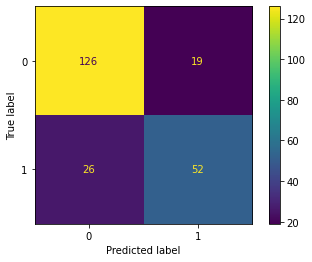

In [178]:
cms = confusion_matrix(y_test_xgb, xgb_pred, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

## Conclusion

From the above exercise we can see that Quadratic Discriminant Analysis(QDA) provides the best result amongst all the models that has been used above. This being a healthcare problem, QDA has been choosen because it has the lowest Type - II error and the highest precision, thus QDA is choosen for this problem.